In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split

In [18]:
df = pd.read_csv(r'https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

In [58]:
for i in df.columns:
    print(i)
    print('-'*30)

    print(df[i].unique())
    print('-'*30)
    

Pregnancies
------------------------------
[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
------------------------------
Glucose
------------------------------
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
------------------------------
BloodPressure
------------------------------
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
-------------

In [85]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [132]:
x= df.iloc [:,0:-1]
y= df.iloc[:, -1]

In [62]:
x_train , x_test, y_train , y_test= train_test_split(x, y , test_size= 0.2, random_state =1)
x_train.shape

(614, 8)

In [25]:
from sklearn.model_selection import GridSearchCV

using decision Tree without any hyperParamter tuning 

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
clf=DecisionTreeClassifier()

In [32]:
clf.fit(x_train , y_train )

DecisionTreeClassifier()

In [33]:
y_pred=clf.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_test, y_pred)

0.6883116883116883

[Text(0.4119537275064267, 0.9666666666666667, 'x[1] <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.15552699228791775, 0.9, 'x[7] <= 28.5\ngini = 0.311\nsamples = 389\nvalue = [314, 75]'),
 Text(0.08483290488431877, 0.8333333333333334, 'x[5] <= 45.4\ngini = 0.167\nsamples = 217\nvalue = [197, 20]'),
 Text(0.056555269922879174, 0.7666666666666667, 'x[5] <= 30.95\ngini = 0.147\nsamples = 213\nvalue = [196, 17]'),
 Text(0.030848329048843187, 0.7, 'x[0] <= 7.5\ngini = 0.031\nsamples = 126\nvalue = [124, 2]'),
 Text(0.02056555269922879, 0.6333333333333333, 'x[6] <= 0.668\ngini = 0.016\nsamples = 125\nvalue = [124, 1]'),
 Text(0.010282776349614395, 0.5666666666666667, 'gini = 0.0\nsamples = 111\nvalue = [111, 0]'),
 Text(0.030848329048843187, 0.5666666666666667, 'x[6] <= 0.704\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.02056555269922879, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.04113110539845758, 0.5, 'gini = 0.0\nsamples = 13\nvalue = [13, 0

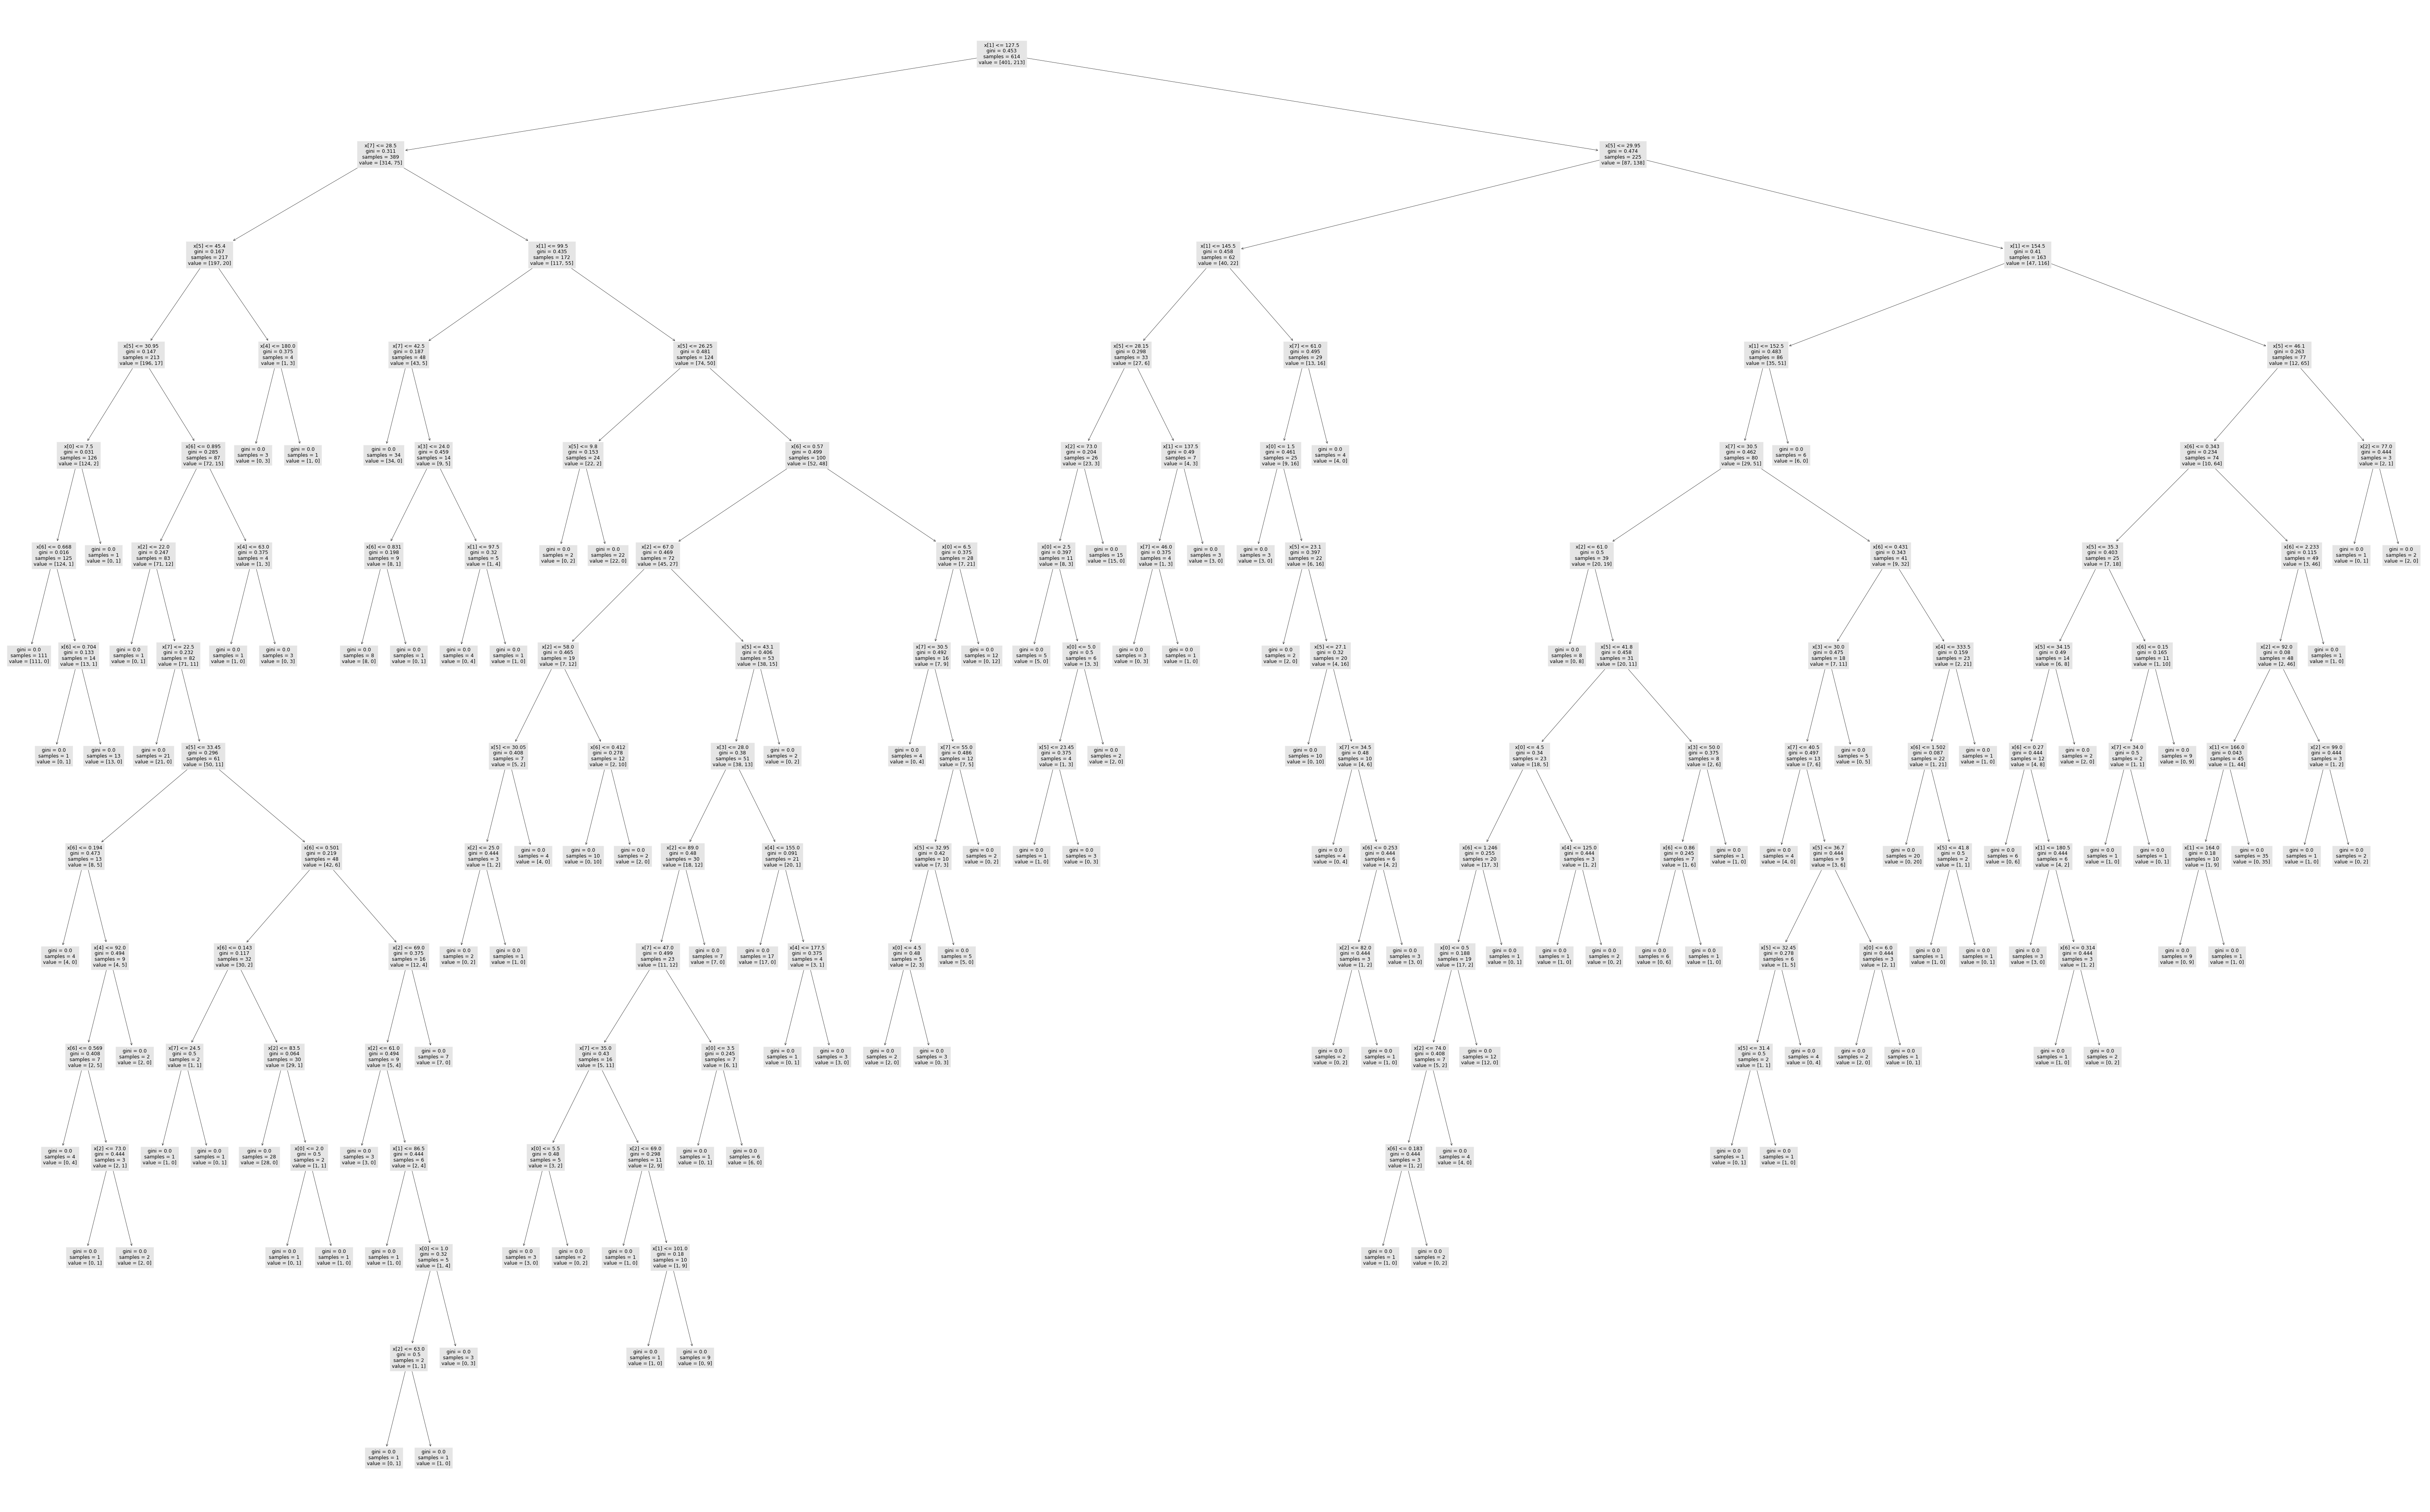

In [40]:
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=80,50
plot_tree(clf)

In [36]:
## using Grid Search CV

In [91]:
##Hyper parameter tuning using gridSearchCV
param_dist={
    "criterion":['gini','entropy'],
    "min_samples_split":[2,3,4,5,6,7,8,9,10],
    "max_depth":[1,2,3,4,5,6,7,8,None],
    "max_features":[1,2,3,4,5,6,7,8]
    
}
grid = GridSearchCV(estimator=clf,param_grid=param_dist, cv=10,n_jobs=-1)

In [92]:
grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, None],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [177]:
print(grid.best_params_)
grid.best_score_
## performing some hyperParameter tuning we improve our performance from 68 to 76 
## Now predicting applying above parameter 

{'criterion': 'gini', 'max_depth': 4, 'max_features': 4, 'min_samples_split': 3}


0.7622686409307246

In [94]:
grid.best_score_
## performing some hyperParameter tuning we improve our performance from 68 to 76 
## Now predicting applying above parameter 

0.7622686409307246

In [100]:
clf1=DecisionTreeClassifier(criterion='gini',max_depth= 4,max_features= 4,min_samples_split= 3 )

In [101]:
clf1.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=4, max_features=4, min_samples_split=3)

In [102]:
y_pred1=clf1.predict(x_test)


In [103]:
accuracy_score(y_test, y_pred1)

0.7597402597402597

In [113]:
!pip install dtreeviz

Defaulting to user installation because normal site-packages is not writeable


In [160]:
import graphviz.backend as be
from dtreeviz import *
from IPython.display import Image, display_svg, SVG

In [161]:
x.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [162]:
clf.classes_

array([0, 1])

In [137]:
clf.classes_

array([0, 1])

In [171]:
y=df[['Outcome']]
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


[Text(0.5, 0.9, 'Glucose <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]\nclass = 0'),
 Text(0.25, 0.7, 'BMI <= 26.9\ngini = 0.311\nsamples = 389\nvalue = [314, 75]\nclass = 0'),
 Text(0.125, 0.5, 'BMI <= 9.1\ngini = 0.066\nsamples = 117\nvalue = [113, 4]\nclass = 0'),
 Text(0.0625, 0.3, 'Age <= 28.0\ngini = 0.408\nsamples = 7\nvalue = [5, 2]\nclass = 0'),
 Text(0.03125, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = 0'),
 Text(0.09375, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 1'),
 Text(0.1875, 0.3, 'BMI <= 26.45\ngini = 0.036\nsamples = 110\nvalue = [108, 2]\nclass = 0'),
 Text(0.15625, 0.1, 'gini = 0.019\nsamples = 103\nvalue = [102, 1]\nclass = 0'),
 Text(0.21875, 0.1, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]\nclass = 0'),
 Text(0.375, 0.5, 'Glucose <= 99.5\ngini = 0.386\nsamples = 272\nvalue = [201, 71]\nclass = 0'),
 Text(0.3125, 0.3, 'Pregnancies <= 11.5\ngini = 0.196\nsamples = 100\nvalue = [89, 11]\nclass = 0'),
 Text(0.28125, 0.1, 'gini = 0.1

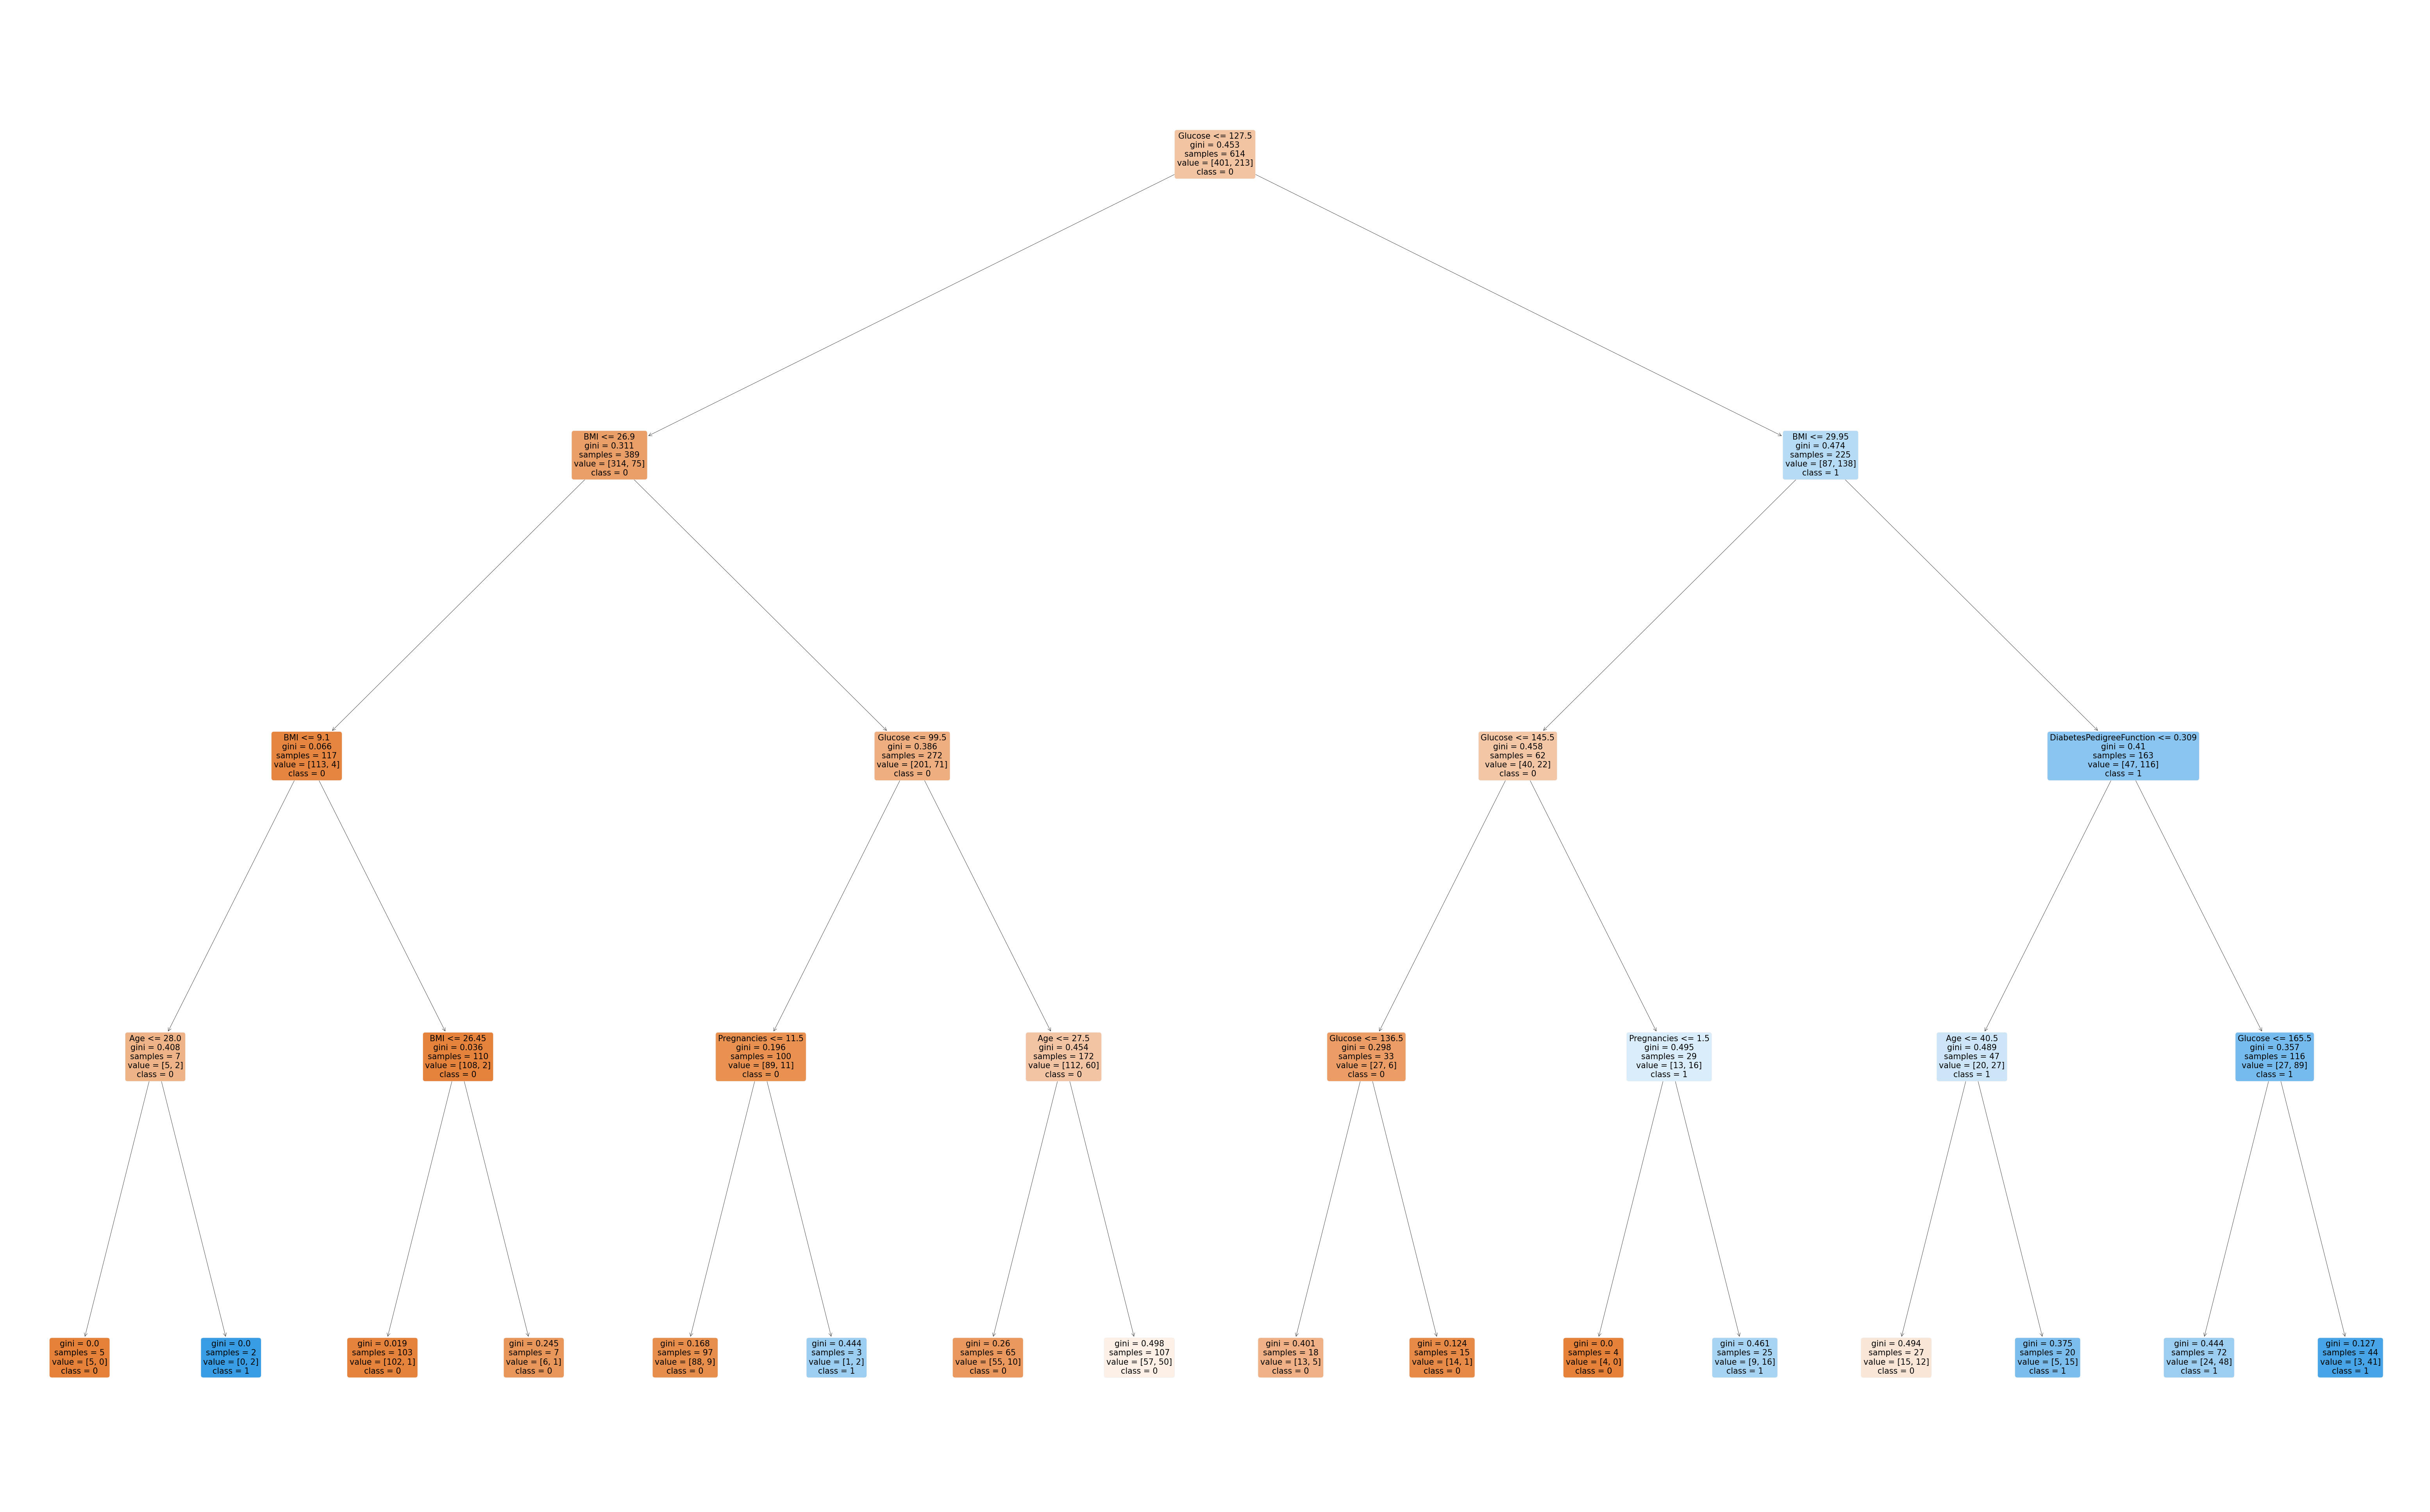

In [176]:
plot_tree(clf1,feature_names=x_train.columns, class_names= ['0','1'],filled=True, rounded=True)

<div>
    <img src='decision_1.jpeg' width = 400>
    <img src='decision_2.jpeg' width = 400>
</div>


<div>
    <img src='decision_3.jpeg' width = 400>
    <img src='decision_4.jpeg' width = 400>
</div>